In [1]:
%env OMP_NUM_THREADS=8

env: OMP_NUM_THREADS=8


In [2]:
from sklearn.base import BaseEstimator
import xgboost as xgb


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%env THEANO_FLAGS=device=gpu3,floatX=float32

import theano, lasagne
import theano.tensor as T
from lasagne.layers import *

env: THEANO_FLAGS=device=gpu3,floatX=float32


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 3: Tesla K80 (CNMeM is enabled with initial size: 19.0% of memory, cuDNN 5110)


In [4]:
%pylab inline
import time
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import theano
theano.config.floatX = 'float32'
import theano.tensor as T
import theano
import theano.tensor as T
import lasagne

from lasagne.regularization import regularize_layer_params_weighted, l2, l1
from lasagne.regularization import regularize_layer_params


Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['reshape', 'shape', 'pad', 'flatten', 'helper']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
from itertools import *
import pickle

In [90]:
%reload_ext autoreload
%autoreload 2

import dem
import custom_nn
import class_helper

In [7]:
def preprocess1(str1, str2):
    X1, hypo1, y1, energy1, X2, hypo2, y2, energy2 =  dem.write_data(str1, str2)
    X_all = np.concatenate((X1, X2), axis=0)
    print "X_all shape", X_all.shape
    Y_all = np.concatenate((y1, y2), axis=0)
    return X_all, Y_all

** Total data uses on simple training **

In [8]:
X,Y = preprocess1("Area2Pi.pcl", "Area2Ph_1.pcl")

X_all shape (204546, 2, 5, 5)


** Cut data - we use it on cv **

In [12]:
import numpy as np
ix = np.arange(len(X))
np.random.shuffle(ix)
X = X[ix]
Y = Y[ix]
X_cut = X[:100000]
Y_cut = Y[:100000]
X_val = X[150000:]
Y_val = Y[150000:]

In [27]:
%pylab inline
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_cut, Y_cut)

print "Xtrain [shape - %s]:", X_train[0].shape
print "Xtest [shape - %s]:", X_train[0].shape


Populating the interactive namespace from numpy and matplotlib
Xtrain [shape - %s]: (2, 5, 5)
Xtest [shape - %s]: (2, 5, 5)


# 1 . Plateaux

** Firstly run heavy (3*300) NN 300 epoch **

In [14]:
test_curve_h = list()
train_curve_h = list()

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn3(-2, "All", ecal_units=300, ps_units = 10, drop_ = 0, drop_ps = 0)
initial = 0
for epoch in range(600):
    for Xb,yb in class_helper.iterate_minibatches(X_train,y_train,100,shuffle=True):
        _ = train_fun1(Xb, yb)

    y_proba_1 = predict_fun(X_train)
    y_proba_2 = predict_fun(X_test)
    roc_auc_test = roc_auc_score(y_val, y_proba_2[:,1])
    test_curve_h.append(roc_auc_test)
    roc_auc_train = roc_auc_score(y_train, y_proba_1[:,1])
    train_curve_h.append(roc_auc_train)
    if (initial == 0 or initial == 99 or initial == 199 or initial == 299 or initial == 399):
        print initial
        print "test", roc_auc_test
        print "train", roc_auc_train 
    initial = initial + 1
fpr_, tpr_, thresholds_ = roc_curve(y_val, y_proba_2[:,1])

All
0
test 0.75667344844
train 0.756691367688
99
test 0.848443810681
train 0.853830270068
199
test 0.858482053563
train 0.868706832258
299
test 0.859521617062
train 0.870892687543
399
test 0.862359764511
train 0.876661159505


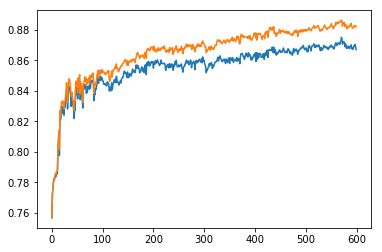

In [17]:
plt.plot(test_curve_h)
plt.plot(train_curve_h)
plt.savefig('N4_600epoch.png')

with open("pleteaux3l.pcl",'w') as fout:
    pickle.dump([test_curve_h, train_curve_h] ,fout) # не сохранилось!!!


** Then run (2\*250/2*10) **

In [20]:
test_curve_l = list()
train_curve_l = list()

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn_250_10(-2, "All")
initial = 0
for epoch in range(300):
    for Xb,yb in class_helper.iterate_minibatches(X_train,y_train,100,shuffle=True):
        _ = train_fun1(Xb, yb)

    y_proba_1 = predict_fun(X_train)
    y_proba_2 = predict_fun(X_test)
    roc_auc_test = roc_auc_score(y_val, y_proba_2[:,1])
    test_curve_l.append(roc_auc_test)
    roc_auc_train = roc_auc_score(y_train, y_proba_1[:,1])
    train_curve_l.append(roc_auc_train)
    if (initial == 0 or initial == 99 or initial == 199 or initial == 299 or initial == 399):
        print initial
        print "test", roc_auc_test
        print "train", roc_auc_train 
    initial = initial + 1
fpr_, tpr_, thresholds_ = roc_curve(y_val, y_proba_2[:,1])

All
0
test 0.786395908852
train 0.785767756957
99
test 0.850822802969
train 0.85937803562
199
test 0.866972670158
train 0.875152561513
299
test 0.869355448171
train 0.879472753494


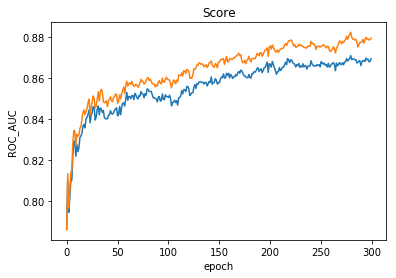

In [21]:
plt.title("Score")
plt.xlabel('epoch')
plt.ylabel('ROC_AUC')
plt.plot(test_curve_l)
plt.plot(train_curve_l)
plt.savefig('N4_300epoch.png')

with open("pleteaux2l.pcl",'w') as fout:
    pickle.dump([test_curve_l, train_curve_l, [], []],fout)


** It's seems to be OK to run 200 epoch to 1-2 layer NN and 500 epoch to 3-4 layer NN.If i run all, i take 500 **

## 2. Stability

**Then run (2\*250/2*10) 5 times with different init**

In [ ]:
save_list = []
for i in range(5):
    test_curve = list()
    train_curve = list()

    train_fun1, accuracy_fun1, predict_fun1 = custom_nn.make_nn_250_10(-2, "All") #2 layer as higher 400 units&
    
    test_, train_ = class_helper.single_train(train_fun1, predict_fun1, X_train,y_train,  X_test,y_test, 600)
    save_list.append(train_)
    plt.plot(train_,label=str(i))
    
with open("stability.pcl",'w') as fout:
    pickle.dump(save_list,fout)

plt.legend()
plt.savefig('diff_init.png')
plt.show()

All
test 0.768886266408
train 0.778695035436
test 0.844863585749
train 0.859502826547
test 0.860023374537
train 0.876101366924
All
test 0.776922405241
train 0.784165488457
test 0.840579918633
train 0.853112709452
test 0.853972365831
train 0.869744223195
All
test 0.785097588106
train 0.790484764201
test 0.847604439994
train 0.858358280907
test 0.854340757173
train 0.868983132681
All


** Seems to be stable **

##  3. Overfitting ##
** Calorimeter / preshower data **

## 2 layers: ##
* **calorimeter branch 250, ps 50** 
* **cl 250 ps 10** 
* **cl 250**

In [ ]:
train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn2(-2, 'Calo', ecal_units=250, ps_units = 10, drop_ = 0, drop_ps = 0)
initial = 0

test_curve4, train_curve4 = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn2(-2, 'All', ecal_units=250, ps_units = 10, drop_ = 0, drop_ps = 0)
initial = 0

test_curve5, train_curve5 = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn2(-2, 'All', ecal_units=250, ps_units = 50, drop_ = 0, drop_ps = 0)
initial = 0

test_curve6, train_curve6 = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)


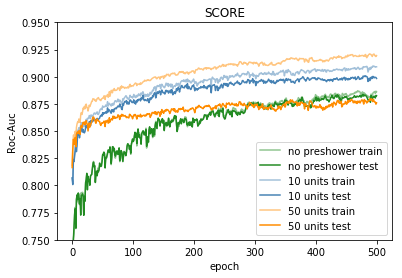

In [86]:
plt.title('SCORE')
plt.ylim(0.75, 0.95)
plt.ylabel('Roc-Auc')
plt.xlabel('epoch')
plt.plot(test_curve4, color = 'forestgreen', label = 'no preshower train', alpha = 0.5)
plt.plot(train_curve4, color = 'forestgreen', label = 'no preshower test')
plt.plot(test_curve5, color = 'steelblue', label = '10 units train', alpha = 0.5)
plt.plot(train_curve5, color = 'steelblue', label = '10 units test')
plt.plot(test_curve6, color='darkorange', label = '50 units train', alpha = 0.5)
plt.plot(train_curve6, color='darkorange', label = '50 units test')
plt.legend(loc='lower right')
plt.savefig("simple_ecal_vs_ps_2l-1.png")
plt.show()

** Save **

In [87]:
import pickle
with open("ov_f_2nn.pcl",'w') as fout:
    pickle.dump([test_curve4, train_curve4, test_curve5, train_curve5, test_curve6, train_curve6],fout)


## 3 layers: ##
* **calorimeter branch 250, ps 50** 
* **cl 250 ps 10** 
* **cl 250**

In [ ]:
train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn3(-2, 'Calo', ecal_units=100, ps_units = 10, drop_ = 0, drop_ps = 0)
initial = 0

test_curve, train_curve = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn3(-2, 'All', ecal_units=100, ps_units = 10, drop_ = 0, drop_ps = 0)
initial = 0

test_curve1, train_curve1 = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)

train_fun1, accuracy_fun1, predict_fun = custom_nn.make_nn3(-2, 'All', ecal_units=100, ps_units = 50, drop_ = 0, drop_ps = 0)
initial = 0

test_curve0, train_curve0 = class_helper.single_train(train_fun1, predict_fun, X_train,y_train,  X_val,y_val, 500)

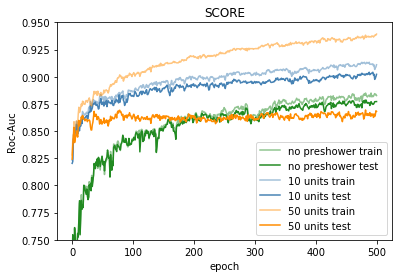

In [85]:
plt.title('SCORE')
plt.ylim(0.75, 0.95)
plt.ylabel('Roc-Auc')
plt.xlabel('epoch')
plt.plot(test_curve, color = 'forestgreen', label = 'no preshower train', alpha = 0.5)
plt.plot(train_curve, color = 'forestgreen', label = 'no preshower test')
plt.plot(test_curve1, color = 'steelblue', label = '10 units train', alpha = 0.5)
plt.plot(train_curve1, color = 'steelblue', label = '10 units test')
plt.plot(test_curve0, color='darkorange', label = '50 units train', alpha = 0.5)
plt.plot(train_curve0, color='darkorange', label = '50 units test')
plt.legend(loc='lower right')
plt.savefig("simple_ecal_vs_ps_3l-1.png")
plt.show()

** Save **

In [88]:
with open("ov_f_3nn.pcl",'w') as fout:
    pickle.dump([test_curve, train_curve, test_curve1, train_curve1, test_curve0, train_curve0],fout)

** In  the same configuration: ** 
* dropping PS enformation cannot make score better 
* on "big" number of layer much PS gives pronounced overfitting 


** Conclusion: on 3-4 layer NN we take only 10 units for PS brunch**

## 4. Launch with different number of layers ##
* In every configuration number of units varies 

## Result of 1-layer - global_score_1 ##

In [80]:
def print_fix_layer_score(score_, num_layer = 1, ticks = ['(10, 100, 0)', '(10, 250, 0)','(10, 500, 0.05)','(10, 800, 0.1)','(50, 100, 0)', '(50, 250, 0.03)']):
    plt.figure(figsize=(9,5))
    my_xticks = ticks
    x = [i+1 in range(len(my_xticks))]
    
    y0 = [score_[i][0] for i in range(len(score_))]
    y1 = [score_[i][1] for i in range(len(score_))]
    y2 = [score_[i][2] for i in range(len(score_))]
    
    x = x[:len(score_)]
    my_xticks = my_xticks[:len(score_)]
    
    plt.xticks(x, my_xticks)
    plt.scatter(x, y0)
    plt.scatter(x, y1)
    plt.scatter(x, y2)

    plt.xlabel('NN with '+str(num_layer)+' layer')
    plt.ylabel('Score on test')
    plt.title(str(num_layer)+' layer NN')
    plt.savefig('NN_with_'+str(1)+'_layer.jpg')

In [81]:
global_score_1 = [array([ 0.86502186,  0.86221505,  0.85922048]),
 array([ 0.86584744,  0.8611413 ,  0.86413028]),
 array([ 0.86773202,  0.8725515 ,  0.8653392 ]),
 array([ 0.8667166 ,  0.86620456,  0.85651782]),
 array([ 0.86340569,  0.85941974,  0.84424545]),
 array([ 0.85514866,  0.85673116,  0.85647907])]

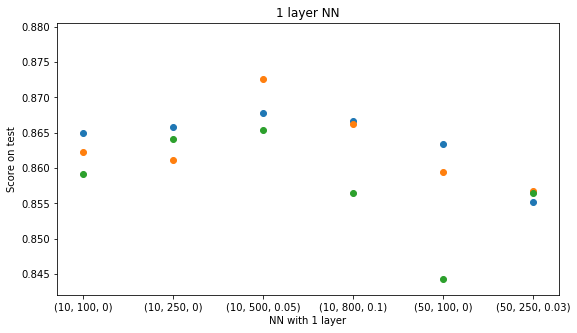

In [83]:
dem.print_cv_score(global_score_1, num_layer = 1)

## Result of 2-layer - global_score_2 ##

In [65]:
global_score_2 = [array([ 0.88016249,  0.86368147,  0.88551829]),
array([ 0.86854602,  0.85562986,  0.87796684]),
array([ 0.85164536,  0.85467838,  0.86483945]),
array([ 0.84134806,  0.8274111 ,  0.85361985]),
array([ 0.83815537,  0.82209781,  0.81910918]),
array([ 0.82433091,  0.82874915,  0.82108873])]

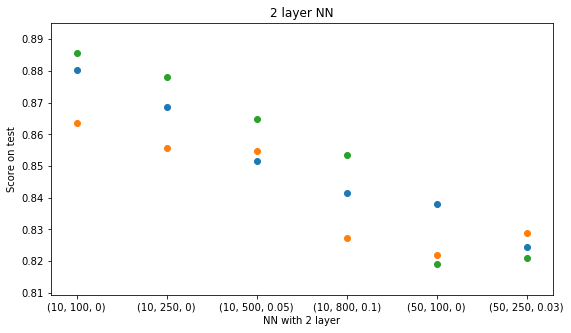

In [84]:
dem.print_cv_score(global_score_2, num_layer = 2)

## Result of 3-layer - global_score_3 ##

In [67]:
global_score_3 = [array([ 0.87819729, 0.8682659, 0.84260292]),
array([ 0.84431973,  0.85323244,  0.8518384 ]),
array([ 0.83166039,  0.82847475,  0.83232346]),
array([ 0.81792454,  0.82997728,  0.8205167 ])]

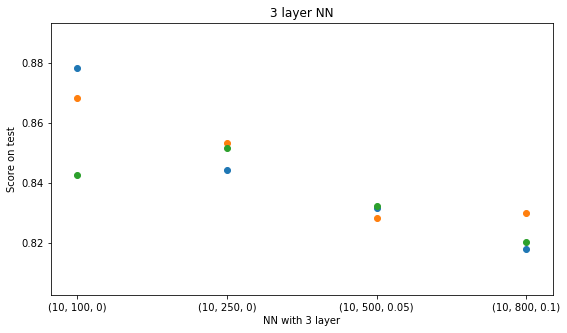

In [85]:
dem.print_cv_score(global_score_3, num_layer = 3)

## Launch result of 4-layer NN - global_score_4 ##

In [70]:
global_score_4 = [array([ 0.86882893,  0.85689721,  0.86252959]),
 array([ 0.86310487,  0.78596087,  0.8247023 ]),
 array([ 0.78724797,  0.78353075,  0.7894767 ]),
 array([ 0.78710824,  0.79302903,  0.78436942])]

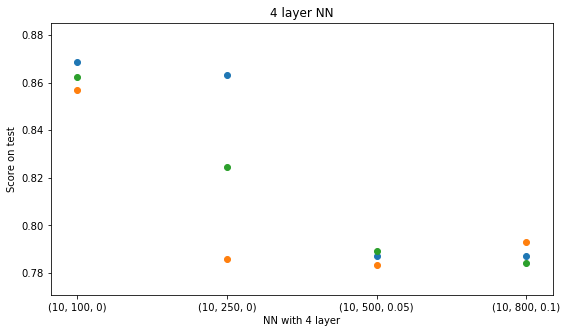

In [86]:
dem.print_cv_score(global_score_4, num_layer = 4)

** Choose 2 layer NN with 100 and 10 units **

## 5. Different regularizers ## 
* Adadelta
* Adagrad lr = 1.0 (default)
* Adagrad lr = 0.5
* Adagrad lr = 0.05 
* Sgd lr = 0.5
* Sgd lr = 0.05
* Sgd lr = 0.01 (best, use for momentum)
* Sgd momentum lr = 0.01, m = 0.9
* Sgd momentum lr = 0.01, m = 0.9

In [87]:
adadelta = [0,8456, 0.8389, 0.8365]
adagrad_05 = [0.7869, 0.7792, 0.7833]
adagrad_1 = [0.7695, 0.7675, 0.7723]
adagrad_005 = [0.8517, 0.8622, 0.8689]
sgd_05 = [0.5110, 0.5846, 0.5010]
sgd_005 = [0.7845, 0.7689, 0.7738]
sgd_001 = [0.7824, 0.7912, 0.7927]
momentum_09 = [0.7705, 0.7627, 0.7721]
momentum_099 = [0.6472, 0.6233, 0.6755]
score =[array(adadelta),array(adagrad_05),array(adagrad_1),array(adagrad_005),array(sgd_05),array(sgd_005),array(sgd_001),array(momentum_09),array(momentum_099)]

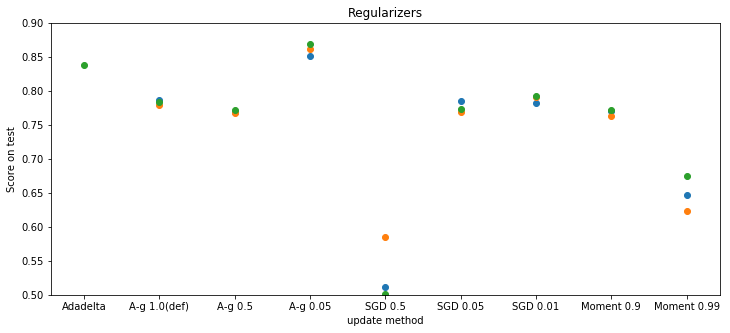

In [92]:
dem.print_cv_score(score, num_layer = 'upd', 
                   ticks = ['Adadelta','A-g 1.0(def)','A-g 0.5','A-g 0.05', 'SGD 0.5', 'SGD 0.05', 'SGD 0.01', 'Moment 0.9', 'Moment 0.99'])

## Final score ##

nn2
test 0.80402053424
train 0.800656834754
test 0.874332489243
train 0.877277892387
test 0.883739051232
train 0.890738790842


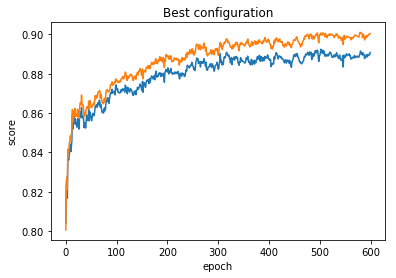

In [33]:
train_fun_best, accuracy_fun_best, predict_fun_best = custom_nn.make_nn2(-2, "All", 100, 10, 0, 0) #2 layer as higher 400 units&
    
test_, train_ = class_helper.single_train(train_fun_best, predict_fun_best, X_cut,Y_cut,  X_val,Y_val, 600)

plt.title("Best configuration")
plt.plot(train_,label="train")
plt.plot(test_, label="test")
plt.xlabel("epoch")
plt.ylabel("score")
plt.savefig("NNbestconf.png")
plt.show()